In [1]:
import pandas as pd
import os
import warnings
#import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

warnings.filterwarnings("ignore")
os.chdir(r"C:\Users\ezkiska\Videos\Imarticus\Python\5th Week 4th & 5th Jan\LDA project wine")

data = np.loadtxt('wine.data.txt', delimiter=',')

In [4]:
df = pd.DataFrame(data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,1.0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,1.0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,1.0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,1.0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [5]:
cols = ['Type', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
        'Flavonoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',  
        'Dilution', 'Proline']

In [7]:
df.columns = cols # Adding Column names 

In [8]:
df.head()

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavonoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,Dilution,Proline
0,1.0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,1.0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,1.0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,1.0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,1.0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [9]:
df.isnull().sum() # Checking Nulls

Type                    0
Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavonoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
Dilution                0
Proline                 0
dtype: int64

In [10]:
df['Type'].value_counts()/df.shape[0] #// Counts the proportion of each type 

2.0    0.398876
1.0    0.331461
3.0    0.269663
Name: Type, dtype: float64

count    178.000000
mean       1.938202
std        0.775035
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: Type, dtype: float64


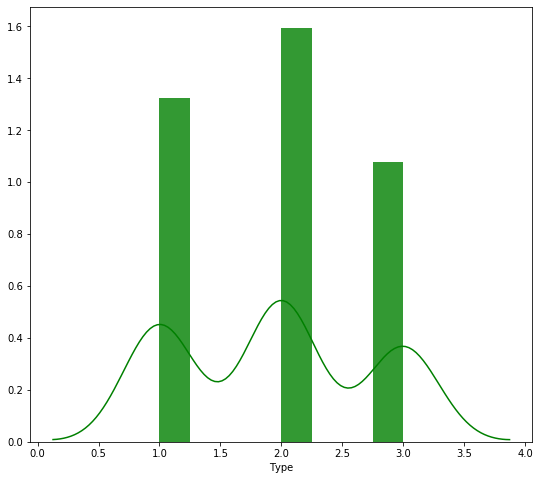

In [11]:
"""check for normality""" ############################################

print(df['Type'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['Type'], color='g', bins=8, hist_kws={'alpha': 0.8});

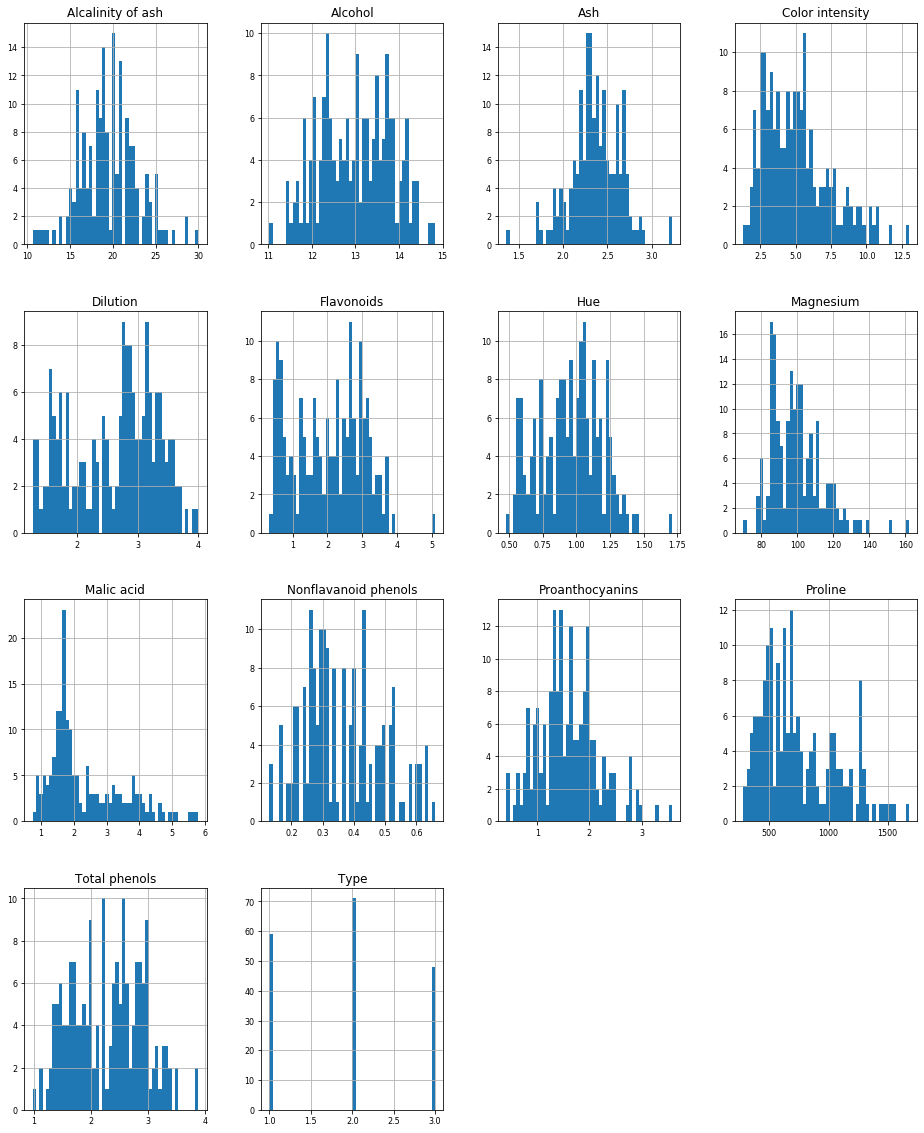

In [12]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

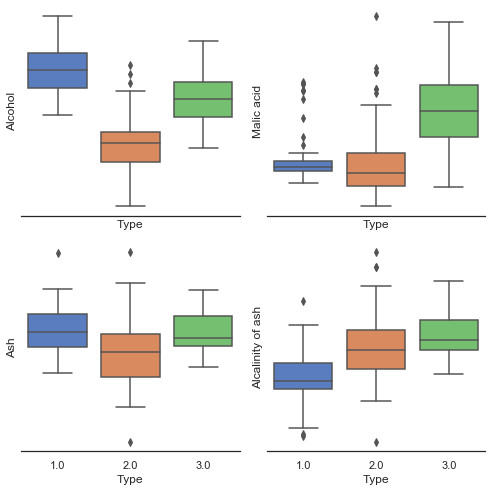

In [13]:
''' 1.  perform outlier treatment'''
'''np.percentile(1,99), boxplot'''


''' 1st Check Outliers '''

'''Now we will do outlier check'''

sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)
sns.boxplot(y = df.iloc[:,1], x = df['Type'], data = df, ax = axes[0][0])
sns.boxplot(y = df.iloc[:,2], x = df['Type'], data = df, ax = axes[0][1])
sns.boxplot(y = df.iloc[:,3], x = df['Type'], data = df, ax = axes[1][0])
sns.boxplot(y = df.iloc[:,4], x = df['Type'], data = df, ax = axes[1][1])
plt.setp(axes, yticks=[])
plt.tight_layout()

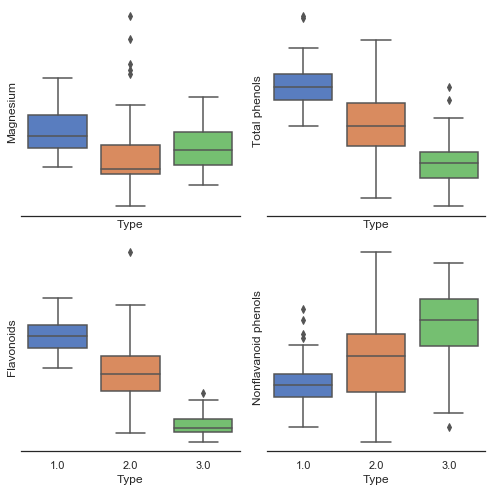

In [14]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)
sns.boxplot(y = df.iloc[:,5], x = df['Type'], data = df, ax = axes[0][0])
sns.boxplot(y = df.iloc[:,6], x = df['Type'], data = df, ax = axes[0][1])
sns.boxplot(y = df.iloc[:,7], x = df['Type'], data = df, ax = axes[1][0])
sns.boxplot(y = df.iloc[:,8], x = df['Type'], data = df, ax = axes[1][1])
plt.setp(axes, yticks=[])
plt.tight_layout()

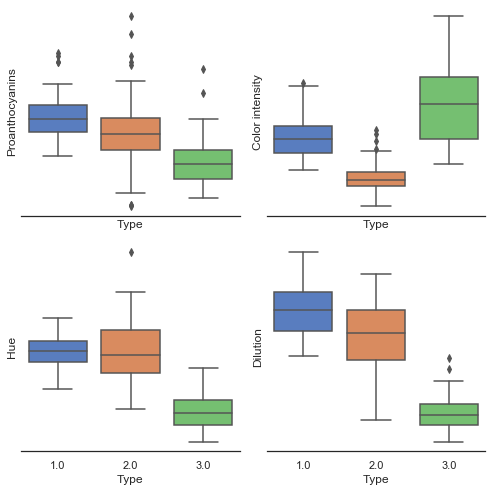

In [15]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)
sns.boxplot(y = df.iloc[:,9], x = df['Type'], data = df, ax = axes[0][0])
sns.boxplot(y = df.iloc[:,10], x = df['Type'], data = df, ax = axes[0][1])
sns.boxplot(y = df.iloc[:,11], x = df['Type'], data = df, ax = axes[1][0])
sns.boxplot(y = df.iloc[:,12], x = df['Type'], data = df, ax = axes[1][1])
plt.setp(axes, yticks=[])
plt.tight_layout()

In [16]:
## No outliers #####

y = df.iloc[:,0] # y = df['Type']
X = df.iloc[:,1:]
X = np.array(X)

train acc: 0.98
test acc: 0.96
confusion matrix:
 [[19  1  0]
 [ 0 21  0]
 [ 0  0 13]]
classification report:
               precision    recall  f1-score   support

         1.0       1.00      0.95      0.97        20
         2.0       0.95      1.00      0.98        21
         3.0       1.00      1.00      1.00        13

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

********************************************************************************
train acc: 0.98
test acc: 0.96
confusion matrix:
 [[19  1  0]
 [ 0 21  0]
 [ 0  0 13]]
classification report:
               precision    recall  f1-score   support

         1.0       1.00      0.95      0.97        20
         2.0       0.95      1.00      0.98        21
         3.0       1.00      1.00      1.00        13

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98 

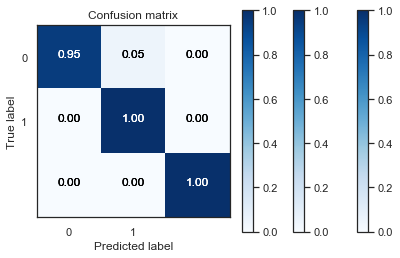

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
#from matplotlib import colors
from sklearn.model_selection import cross_val_score #,cross_val_predict
from sklearn import metrics
from sklearn import preprocessing
from confusionMatrix import plotConfusionMatrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

scoresTr = []
scoresTe = []
for i in range(1,4):
    lda = LinearDiscriminantAnalysis(n_components=2) # number of components = n_classes-1

    clf = lda.fit(X_train, y_train)
    
    drX = lda.transform(X_train)
    
    scores1 = cross_val_score(clf, X_train, y_train, cv=5)
    scores2 = cross_val_score(clf, X_test, y_test, cv=5)
    print('train acc:', np.round(np.mean(scores1),2))
    print('test acc:', np.round(np.mean(scores2),2))
    pred = clf.predict(X_test)
    cm = metrics.confusion_matrix(pred,y_test)
    cr = metrics.classification_report(pred,y_test)
    plotConfusionMatrix(cm, 3)
    print('confusion matrix:\n', cm)
    print('classification report:\n', cr)
    print('*'*80)
    scoresTr.append(np.mean(scores1))
    scoresTe.append(np.mean(scores2))

In [19]:
from sklearn.model_selection import ShuffleSplit
n_samples = X.shape[0]
cv_ = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
scores3 = cross_val_score(clf, X_train, y_train, cv=cv_)
scores4 = cross_val_score(clf, X_test, y_test, cv=cv_)
print('train acc after SSplit:', np.round(np.mean(scores3),2))
print('test acc after SSplit:', np.round(np.mean(scores4),2))
print('*'*80)

train acc after SSplit: 0.98
test acc after SSplit: 0.98
********************************************************************************


In [20]:
## scaling
scaler = preprocessing.StandardScaler().fit(X)
Xs = scaler.transform(X)

Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3, random_state=0)
clfs = lda.fit(Xs_train, y_train)
scores5 = clfs.score(Xs_train, y_train)
scores6 = clfs.score(Xs_test, y_test)  
print('train acc after scaling:', np.round(np.mean(scores5),2))
print('test acc after scaling:', np.round(np.mean(scores6),2))
preds = clfs.predict(Xs_test)
cms = metrics.confusion_matrix(preds,y_test)
crs = metrics.classification_report(preds,y_test)
print('confusion matrix after scaling:\n', cms)
print('classification report after scaling:\n', crs)

train acc after scaling: 1.0
test acc after scaling: 0.98
confusion matrix after scaling:
 [[19  1  0]
 [ 0 21  0]
 [ 0  0 13]]
classification report after scaling:
               precision    recall  f1-score   support

         1.0       1.00      0.95      0.97        20
         2.0       0.95      1.00      0.98        21
         3.0       1.00      1.00      1.00        13

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



train acc: 0.98
test acc: 0.96
confusion matrix:
 [[19  1  0]
 [ 0 21  0]
 [ 0  0 13]]
classification report:
               precision    recall  f1-score   support

         1.0       1.00      0.95      0.97        20
         2.0       0.95      1.00      0.98        21
         3.0       1.00      1.00      1.00        13

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

********************************************************************************
train acc: 0.98
test acc: 0.96
confusion matrix:
 [[19  1  0]
 [ 0 21  0]
 [ 0  0 13]]
classification report:
               precision    recall  f1-score   support

         1.0       1.00      0.95      0.97        20
         2.0       0.95      1.00      0.98        21
         3.0       1.00      1.00      1.00        13

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98 

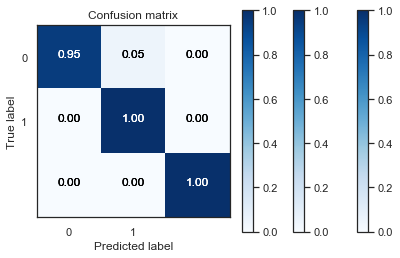

In [21]:
#------------------------------Selection of n_components -------------------------------------------------------
scoresTr = []
scoresTe = []
for i in range(1,4):
    lda = LinearDiscriminantAnalysis(n_components=i) # number of components = n_classes-1

    clf = lda.fit(X_train, y_train)
    
    drX = lda.transform(X_train)
    
    scores1 = cross_val_score(clf, X_train, y_train, cv=5)
    scores2 = cross_val_score(clf, X_test, y_test, cv=5)
    print('train acc:', np.round(np.mean(scores1),2))
    print('test acc:', np.round(np.mean(scores2),2))
    pred = clf.predict(X_test)
    cm = metrics.confusion_matrix(pred,y_test)
    cr = metrics.classification_report(pred,y_test)
    plotConfusionMatrix(cm, 3)
    print('confusion matrix:\n', cm)
    print('classification report:\n', cr)
    print('*'*80)
    scoresTr.append(np.mean(scores1))
    scoresTe.append(np.mean(scores2))

In [22]:
#--------------------------------------------Unscaled ROC-----------------------------------------

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from itertools import cycle

# Binarize the output
y = label_binarize(y, classes=[1,2,3])
n_classes = y.shape[1]
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)
# Learn to predict each class against the other
classifier = OneVsRestClassifier(LinearDiscriminantAnalysis(n_components=2))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


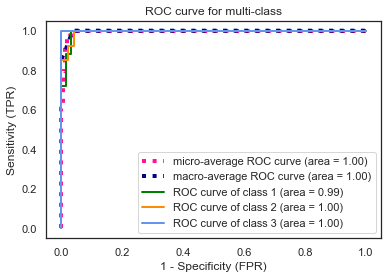

In [23]:
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors_ = cycle(['green', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors_):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))  # i will start from 0

#plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (FPR)')
plt.ylabel('Sensitivity (TPR)')
plt.title('ROC curve for multi-class')
plt.legend(loc=4)
plt.show()

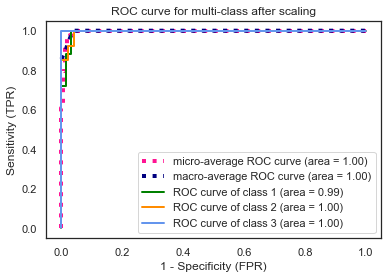

In [24]:
''''------------------------------------Scaled ROC---------'''

# Binarize the output
y = label_binarize(y, classes=[1,2,3])
n_classes = y.shape[1]
# shuffle and split training and test sets
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=.5, random_state=0)
# Learn to predict each class against the other
classifier = OneVsRestClassifier(LinearDiscriminantAnalysis(n_components=2))
ys_score = classifier.fit(Xs_train, y_train).decision_function(Xs_test)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], ys_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROyC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), ys_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)



colors_ = cycle(['green', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors_):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))

#plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (FPR)')
plt.ylabel('Sensitivity (TPR)')
plt.title('ROC curve for multi-class after scaling')
plt.legend(loc=4)
plt.show()